#  Exploring AirBnB in Athens 
### Γραμματικάκης Δημήτρης 8200035
All of the analysis below is based on the ***latest dataset***. It makes no sense to check older records.

## Neighbourhood Listings in Descending Order

Use the `'neighbourhood_cleansed'` column to apply groupby() in the listings dataframe, so we can avoid noisy data.  
Assume that popularity is defined as the number of listings in the area.   
So groupy by neighboorhood and count the listings.

In [1]:
import pandas as pd

listings = pd.read_csv('data/listings.csv')
listings.rename(columns={'neighbourhood_cleansed': 'neighbourhoods'}, inplace=True) # Fix column name

groups = listings.groupby(['neighbourhoods']).count().sort_values(['id'], ascending=False)
groups['count'] = groups['id']
neighbourhoods_descending = groups['count']

neighbourhoods_descending

neighbourhoods
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              2416
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                 1122
ΝΕΟΣ ΚΟΣΜΟΣ                          980
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             979
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     817
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      583
ΠΑΓΚΡΑΤΙ                             511
ΑΜΠΕΛΟΚΗΠΟΙ                          452
ΚΟΛΩΝΑΚΙ                             425
ΑΚΡΟΠΟΛΗ                             386
ΘΗΣΕΙΟ                               386
ΠΕΤΡΑΛΩΝΑ                            352
ΚΕΡΑΜΕΙΚΟΣ                           343
ΚΥΨΕΛΗ                               271
ΣΤΑΔΙΟ                               252
ΓΟΥΔΙ                                230
ΙΛΙΣΙΑ                               216
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     180
ΝΙΡΒΑΝΑ                              174
ΠΑΤΗΣΙΑ                              166
ΛΥΚΑΒΗΤΤΟΣ                           162
ΖΑΠΠΕΙΟ                              161
ΑΝΩ ΚΥΨΕΛΗ                           119
ΓΚΥΖΗ                                118
Π

## Neighbourhood Prices in Descending Order

We only need the columns about neighbourhoods and prices.   
- `remove the "$"` from prices, so we can operate on them.

In [2]:
listings = pd.read_csv('data/listings_detailed.csv')

listings.rename(columns={'neighbourhood_cleansed': 'neighbourhoods'}, inplace=True) # Fix column name
listings = listings[['neighbourhoods', 'price']] # Choose only necessary columns

listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float) # Clean price data

listings

,neighbourhoods,price
0,ΑΜΠΕΛΟΚΗΠΟΙ,144.0
1,ΑΜΠΕΛΟΚΗΠΟΙ,70.0
2,ΑΜΠΕΛΟΚΗΠΟΙ,85.0
3,ΑΜΠΕΛΟΚΗΠΟΙ,60.0
4,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,35.0
...,...,...
12950,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,104.0
12951,ΚΥΨΕΛΗ,99.0
12952,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,30.0
12953,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,53.0


- Then, we `group by` neighbourhood and calculate metrics.  
- After that, `merge` all four metric dataframes into one and `sort` by median (desc)

In [3]:
# Calculate metrics
median = listings.groupby(['neighbourhoods']).median()
mean = listings.groupby(['neighbourhoods']).mean()
std = listings.groupby(['neighbourhoods']).std()
count = listings.groupby(['neighbourhoods']).count()

# Fix columns names
median.rename(columns={'price': 'median'}, inplace=True)
mean.rename(columns={'price': 'mean'}, inplace=True)
std.rename(columns={'price': 'std'}, inplace=True)
count.rename(columns={'price': 'count'}, inplace=True)

# Merge
prices_info = pd.merge(median, pd.merge(
    mean, pd.merge(std, count, how='inner', on='neighbourhoods'), 
    how='inner', on='neighbourhoods'), how='inner', on='neighbourhoods')

# Sort
prices_info = prices_info.sort_values(by='median', ascending=False)
prices_info

,median,mean,std,count
neighbourhoods,,,,
ΡΗΓΙΛΛΗΣ,120.0,367.800000,578.622675,5
ΖΑΠΠΕΙΟ,114.0,224.068323,641.163173,161
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,104.0,140.650662,229.183015,2416
ΑΚΡΟΠΟΛΗ,100.0,195.344560,703.321565,386
ΚΟΛΩΝΑΚΙ,100.0,128.595294,104.431349,425
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,90.5,120.284314,104.613533,1122
ΘΗΣΕΙΟ,90.0,126.492228,124.176775,386
ΚΕΡΑΜΕΙΚΟΣ,89.0,123.883382,136.367487,343
ΛΥΚΑΒΗΤΤΟΣ,75.0,104.561728,87.859850,162


## Availability per Day

- Take `only the available listings` from the dataframe.
- Group by date
- Plot the result in a line graph.

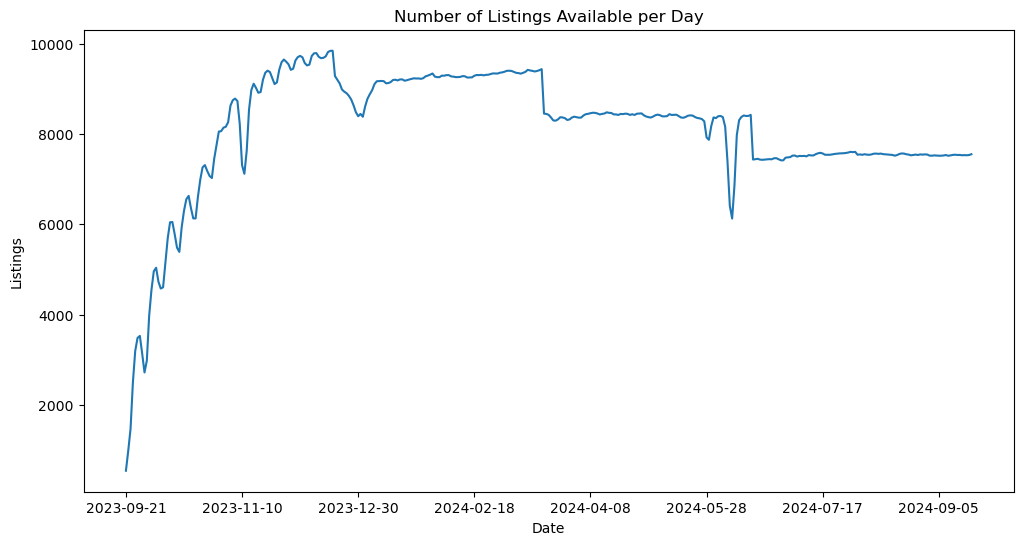

In [4]:
import matplotlib.pyplot as plt

calendar = pd.read_csv('data/calendar.csv')

# Select the available listings only
calendar = calendar[calendar['available'] == 't']

listings_per_day = calendar.groupby('date').size()

# Create a line plot
listings_per_day.plot(kind='line', figsize=(12, 6))

# Set axis labels and plot title
plt.xlabel('Date')
plt.ylabel('Listings')
plt.title('Number of Listings Available per Day')

# Show the plot
plt.show()

## Reviews, Occupacy per Listing, Average Income

All the review info are in `reviews.csv`  
- Group by listing_id and count the reviews for each.  
- Find min and max reviews (round max up to the closest hundred, which is 800), so we can create  
a bin to display in x-axis.

All these listings cannot be displayed, so the bar chart counts how frequent is a number of reviews among all listings.

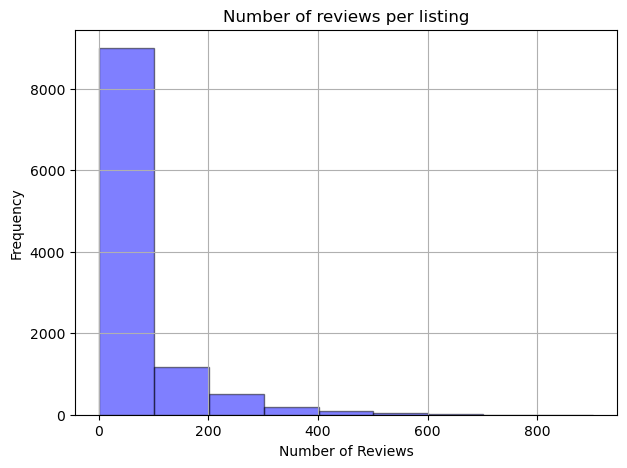

In [5]:
import numpy as np

reviews = pd.read_csv('data/reviews.csv')
reviews = reviews.groupby('listing_id').size()

min_reviews = reviews.min()
max_reviews = reviews.max()

# Calculate the maximum number of reviews rounded up to the closest hundred 
max_reviews_rounded = 100 * np.ceil(max_reviews / 100) 

# Create histogram
plt.figure(figsize=(7, 5))
_ = reviews.hist(
    bins=np.arange(min_reviews, max_reviews_rounded + 101, 100),
    color='blue', edgecolor='black', alpha=0.5)

# Add axis labels
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.title('Number of reviews per listing')

# Show the plot
plt.show()

- Next, take the reviews dataframe and group by listings first and then by month.  
- Fix the columns name `(to 'avg_occupancy')` and double the count of the reviews `(based on our assumption that half the bookings result in reviews)`.  

It makes no sense for a listing to be occupied more than 31 times in a month, so clean the resulting data with a filter.  
(Taking into account the 2nd assumption, that each booking is for a three nights stay, the filter would be <= 11)

In [6]:
reviews = pd.read_csv('data/reviews.csv')

reviews['date'] = pd.to_datetime(reviews.date, format='%Y-%m-%d') # Fix date format
reviews = reviews.groupby(['listing_id', reviews.date.dt.month]).count()

reviews.rename(columns={'date': 'avg_occupancy'}, inplace=True) # Fix column name
 
avg_occupancy = (reviews*2) # Half the bookings end up in reviews
avg_occupancy = avg_occupancy[avg_occupancy <= 31] # Clean resulting data
avg_occupancy

avg_occupancy
listing_id         date               
10595              1               6.0
                   2               8.0
                   3               6.0
                   4               6.0
                   5              12.0
...                                ...
975413215364080586 9               8.0
975966554881091774 9               2.0
976076532701121190 9               2.0
977373669051180593 9               4.0
979596287508787842 9               2.0

[80098 rows x 1 columns]

- Read the listing data and clean the price column by removing "$".  
- Calculate the average price charged throughout all listings and multiply the average occupancy.  

We assume that every booking is for a 3 nights stay, so multiply by 3 as well.  
Finally, fix the columns name.

In [7]:
listings = pd.read_csv('data/listings_detailed.csv')
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float) # Clean price data

avg_price = listings['price'].mean() # Average price throughout all listings
avg_income = (avg_occupancy * 3) * avg_price # Each booking is for a 3 nights stay

avg_income.rename(columns={'avg_occupancy': 'avg_income'}, inplace=True) # Fix column name

avg_income

avg_income
listing_id         date             
10595              1     1988.254574
                   2     2651.006098
                   3     1988.254574
                   4     1988.254574
                   5     3976.509147
...                              ...
975413215364080586 9     2651.006098
975966554881091774 9      662.751525
976076532701121190 9      662.751525
977373669051180593 9     1325.503049
979596287508787842 9      662.751525

[80098 rows x 1 columns]

However, if we want the average income per month for ***all listings***, we can `group only by dt.month` and make the same calculations as before.

In [8]:
reviews = pd.read_csv('data/reviews.csv')

# Set the display format for floats
pd.options.display.float_format = '{:.2f}'.format

reviews['date'] = pd.to_datetime(reviews.date, format='%Y-%m-%d') # Fix date format
reviews = reviews.groupby([reviews.date.dt.month]).count()

reviews.rename(columns={'date': 'avg_income_monthly'}, inplace=True) # Fix column name
del reviews['listing_id'] # Delete unnecessary column
 
avg_occupancy = (reviews*2)  # Half the bookings end up in reviews
avg_income = (avg_occupancy * 3) * avg_price # Each booking is for a 3 nights stay

avg_income

,avg_income_monthly
date,
1,18830759.07
2,18659106.42
3,22557410.89
4,29195530.16
5,41184705.24
6,47920248.98
7,54289291.13
8,54939450.38
9,52491246.24


## Listings per Room Type

From listings.csv we only need the `id and room_type`.  
- Group by room type and calculate the percentage of each, using the total number of listings.

In [9]:
listings = pd.read_csv('data/listings.csv')
listings = listings[['id', 'room_type']] # Choose only necessary columns

total_listings = listings['id'].count()

listings = listings.groupby('room_type').count()
listings['percentage'] = listings['id']/total_listings # Calculate percentage

listings.rename(columns={'id': 'listings'}, inplace=True) # Fix column name
listings

,listings,percentage
room_type,,
Entire home/apt,11652,0.90
Hotel room,105,0.01
Private room,1113,0.09
Shared room,85,0.01


- Here we also need the `'neighbourhood_cleansed'` column, so we can group by both  
neighbourhoods and room types.

In [10]:
listings = pd.read_csv('data/listings.csv')
listings = listings[['id', 'neighbourhood_cleansed', 'room_type']] # Choose only necessary columns
listings.rename(columns={'neighbourhood_cleansed': 'neighbourhoods'}, inplace=True) # Fix column name

listings = listings.groupby(['neighbourhoods', 'room_type']).count()

listings.rename(columns={'id': 'listings'}, inplace=True) # Fix column name
listings

listings
neighbourhoods                   room_type                
1Ο ΝΕΚΡΟΤΑΦΕΙΟ                   Entire home/apt        55
ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ                 Entire home/apt        33
                                 Private room            5
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ Entire home/apt       686
                                 Hotel room              4
...                                                    ...
ΣΤΑΔΙΟ                           Private room           11
ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ                  Entire home/apt        73
                                 Hotel room              4
                                 Private room            4
                                 Shared room             4

[111 rows x 1 columns]

## Prices per Day

Depending on our goals, days can be arranged by 3 different formats:  
-  365 days of the year  
-  31 days of the month  
- 7 days of the week  

(The details are explained in the 1st format only, the same logic applies to the rest.)

First the `Year` format:    
- Clean the data (remove "$", fix column names and convert date to dt values)  
- Group by listings first and by date after and calculate the mean.  

In [11]:
calendar = pd.read_csv('data/calendar.csv')
calendar = calendar[['listing_id', 'date', 'price', 'adjusted_price']] # Choose only necessary columns

calendar['adjusted_price'] = calendar['adjusted_price'].replace('[\$,]', '', regex=True).astype(float) # Clean price data
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float) # Clean price data
calendar['date'] = pd.to_datetime(calendar.date, format='%Y-%m-%d') # Fix date format

calendar = calendar.groupby(['listing_id', 'date']).mean()

calendar

price  adjusted_price
listing_id         date                             
10595              2023-09-21 150.00           60.00
                   2023-09-22 150.00           60.00
                   2023-09-23 150.00           75.00
                   2023-09-24 150.00           90.00
                   2023-09-25 300.00          210.00
...                              ...             ...
984289252638695828 2024-09-15  18.00           18.00
                   2024-09-16  16.00           16.00
                   2024-09-17  16.00           16.00
                   2024-09-18  16.00           16.00
                   2024-09-19  16.00           16.00

[4728229 rows x 2 columns]

- Prepare the dataframe once more (same cleaning as before). Pick only the adjusted prices.

In [12]:
import seaborn as sns
import matplotlib.dates as mdates

calendar = pd.read_csv('data/calendar.csv')

# Pick adjusted prices instead of normal
calendar = calendar[['listing_id', 'date', 'adjusted_price']] # Choose only necessary columns

calendar.rename(columns={'adjusted_price': 'price'}, inplace=True) # Fix column name
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float) # Clean price data
calendar['date'] = pd.to_datetime(calendar.date, format='%Y-%m-%d') # Fix date format

We cannot display all the listings, so we will count the frequency of each price on listings throughout the dates.  
- We use a `heatmap` for this purpose.  
- Fix the date format in x-axis for visualization purposes.

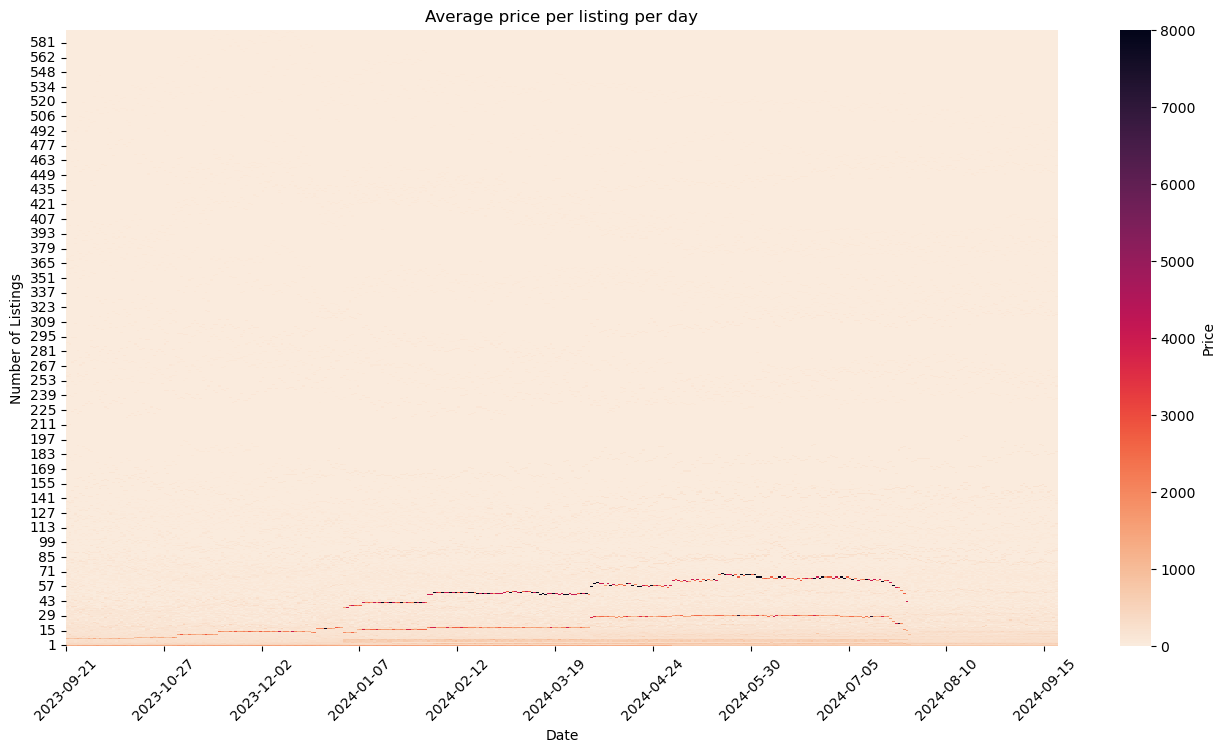

In [13]:
# Prepare aggregate data for heatmap
agg_data = calendar.groupby(['date', 'price'])['listing_id'].count().reset_index()
heatmap_data = agg_data.pivot_table(index='listing_id', columns='date', values='price', fill_value=0)

# Create the heatmap
fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
sns.heatmap(data=heatmap_data,
            cmap='rocket_r',
            cbar=True,
            cbar_kws={'label': 'Price'},
            ax=ax)

# Format date labels and display only a subset of labels
date_labels = [d.strftime('%Y-%m-%d') for i, d in enumerate(heatmap_data.columns)]
x_positions = np.arange(0, len(date_labels), int(len(date_labels) / 10))

# Set axis labels and plot title
ax.set_xticks(x_positions)
ax.set_xticklabels(date_labels[::int(len(date_labels) / 10)], rotation=45)

plt.title('Average price per listing per day')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.gca().invert_yaxis()
plt.show()

However, the results are not visible because the price range `is too long`.  
- Assume that we are interested in prices not greater than 200$ (which are the most common).

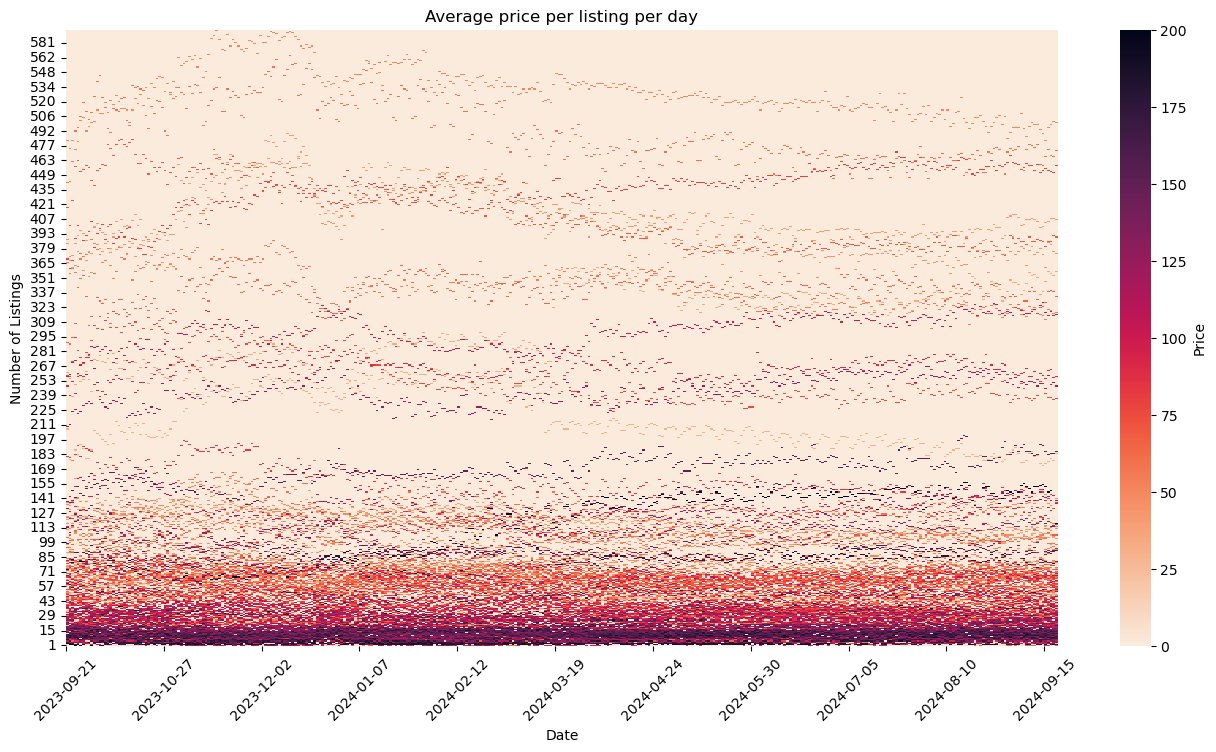

In [14]:
calendar = calendar[calendar['price'] <= 200] # For visualization purposes

# Prepare aggregate data for heatmap
agg_data = calendar.groupby(['date', 'price'])['listing_id'].count().reset_index()
heatmap_data = agg_data.pivot_table(index='listing_id', columns='date', values='price', fill_value=0)

# Create the heatmap
fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
sns.heatmap(data=heatmap_data,
            cmap='rocket_r',
            cbar=True,
            cbar_kws={'label': 'Price'},
            ax=ax)

# Format date labels and display only a subset of labels
date_labels = [d.strftime('%Y-%m-%d') for i, d in enumerate(heatmap_data.columns)]
x_positions = np.arange(0, len(date_labels), int(len(date_labels) / 10))

# Set axis labels and plot title
ax.set_xticks(x_positions)
ax.set_xticklabels(date_labels[::int(len(date_labels) / 10)], rotation=45)

plt.title('Average price per listing per day')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.gca().invert_yaxis()
plt.show()

Now we can see, that the highest prices are distributed in a small number of listings throughout the year.

- Next the `month` format:  

In [15]:
calendar = pd.read_csv('data/calendar.csv')
calendar = calendar[['listing_id', 'date', 'price', 'adjusted_price']] # Choose only necessary columns
 
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[\$,]', '', regex=True).astype(float) # Clean price data
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float) # Clean price data
calendar['date'] = pd.to_datetime(calendar.date, format='%Y-%m-%d') # Fix date format

calendar = calendar.groupby(['listing_id', calendar.date.dt.day]).mean()
del calendar['date'] # Delete unnecessary column

calendar

price  adjusted_price
listing_id         date                       
10595              1    258.33          258.33
                   2    258.33          258.33
                   3    258.33          258.33
                   4    258.33          258.33
                   5    262.50          262.50
...                        ...             ...
984289252638695828 27    16.00           16.00
                   28    16.17           16.17
                   29    16.00           16.00
                   30    16.00           16.00
                   31    16.00           16.00

[401593 rows x 2 columns]

- Visualize the above (adjusted prices only)

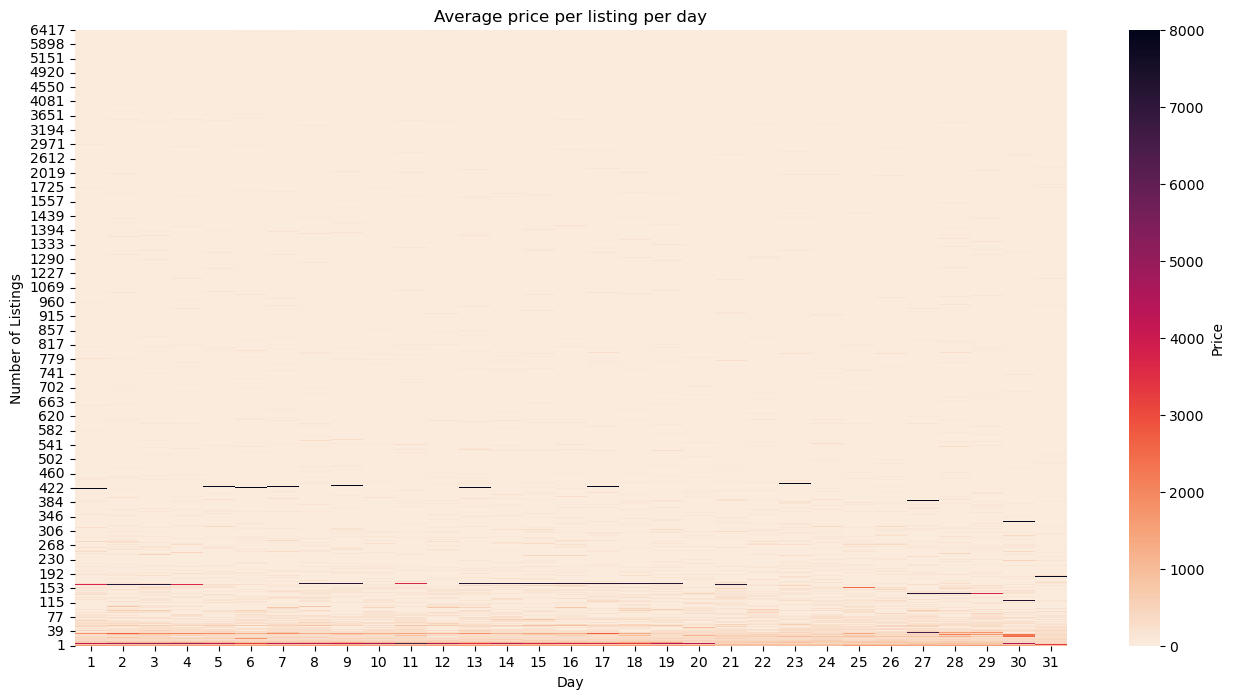

In [16]:
calendar = pd.read_csv('data/calendar.csv')
calendar = calendar[['listing_id', 'date', 'adjusted_price']] # Choose only necessary columns

calendar.rename(columns={'adjusted_price': 'price'}, inplace=True) # Fix column name
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float) # Clean price data
calendar['date'] = pd.to_datetime(calendar.date, format='%Y-%m-%d') # Fix date format

# Prepare aggregate data for heatmap
agg_data = calendar.groupby([calendar.date.dt.day, 'price'])['listing_id'].count().reset_index()
heatmap_data = agg_data.pivot_table(index='listing_id', columns='date', values='price', fill_value=0)

# Create the heatmap
fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
sns.heatmap(data=heatmap_data,
            cmap='rocket_r',
            cbar=True,
            cbar_kws={'label': 'Price'},
            ax=ax)

# Set axis labels and plot title
plt.title('Average price per listing per day')
plt.xlabel('Day')
plt.ylabel('Number of Listings')
plt.gca().invert_yaxis()
plt.show()

Again, `shorten the price range` to make the heatmap more visible.

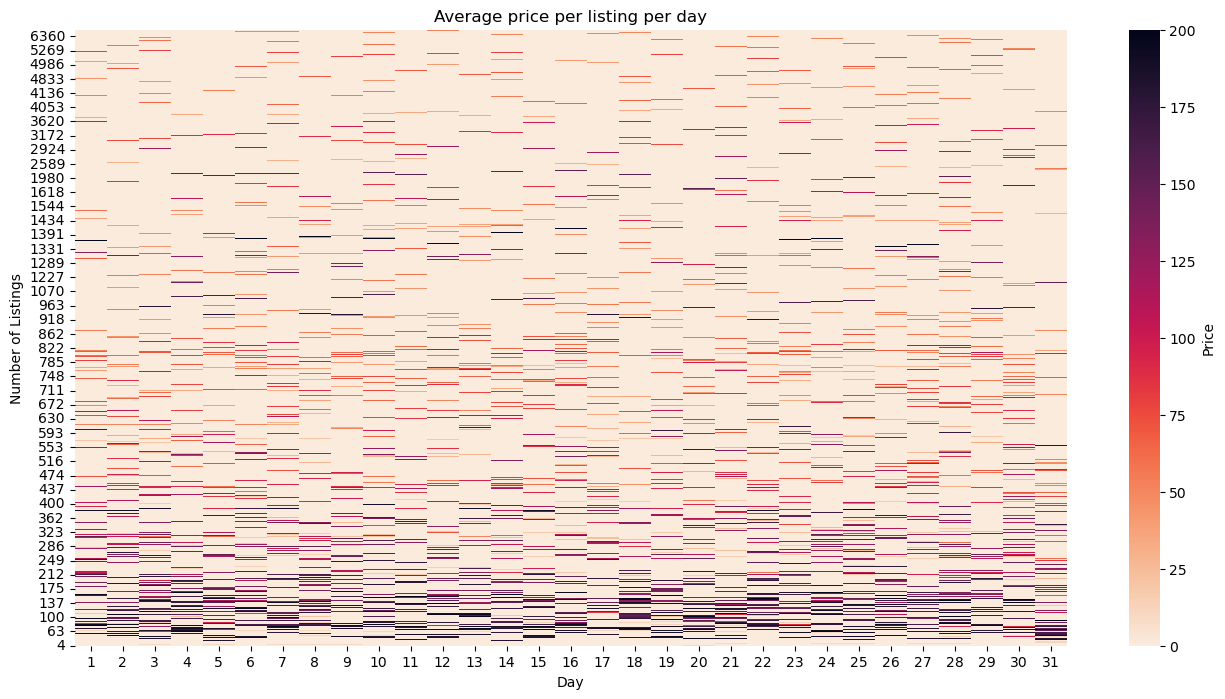

In [17]:
calendar = pd.read_csv('data/calendar.csv')
calendar = calendar[['listing_id', 'date', 'adjusted_price']] # Choose only necessary columns

calendar.rename(columns={'adjusted_price': 'price'}, inplace=True) # Fix column name
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float) # Clean price data
calendar['date'] = pd.to_datetime(calendar.date, format='%Y-%m-%d') # Fix date format

calendar = calendar[calendar['price'] <= 200] # For visualization purposes

# Prepare aggregate data for heatmap
agg_data = calendar.groupby([calendar.date.dt.day, 'price'])['listing_id'].count().reset_index()
heatmap_data = agg_data.pivot_table(index='listing_id', columns='date', values='price', fill_value=0)

# Create the heatmap
fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
sns.heatmap(data=heatmap_data,
            cmap='rocket_r',
            cbar=True,
            cbar_kws={'label': 'Price'},
            ax=ax)

# Set axis labels and plot title
plt.title('Average price per listing per day')
plt.xlabel('Day')
plt.ylabel('Number of Listings')
plt.gca().invert_yaxis()
plt.show()

We can now observe which days of the month have bookings with the highest prices, and also how many listings are involved.

- Finally for `week` format:  

In [18]:
calendar = pd.read_csv('data/calendar.csv')
calendar = calendar[['listing_id', 'date', 'price', 'adjusted_price']] # Choose only necessary columns

calendar['adjusted_price'] = calendar['adjusted_price'].replace('[\$,]', '', regex=True).astype(float) # Clean price data
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float) # Clean price data
calendar['date'] = pd.to_datetime(calendar.date, format='%Y-%m-%d') # Fix date format
calendar.rename(columns={'date': 'day'}, inplace=True) # Fix column name

calendar = calendar.groupby(['listing_id', calendar.day.dt.dayofweek]).mean()

# Define a dictionary to map numbers to day names
day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

del calendar['day'] # Delete unnecessary column

# Convert the 2D index into regular columns, replace values, and set it back as the index
calendar.reset_index(level=1, inplace=True)
calendar['day'] = calendar['day'].map(day_mapping)
calendar = calendar.set_index('day', append=True)

calendar

price  adjusted_price
listing_id         day                             
10595              Monday    263.46          261.73
                   Tuesday   263.46          262.31
                   Wednesday 263.46          262.88
                   Thursday  263.21          261.51
                   Friday    263.46          261.73
...                             ...             ...
984289252638695828 Wednesday  16.00           16.00
                   Thursday   16.00           16.00
                   Friday     16.00           16.00
                   Saturday   16.00           16.00
                   Sunday     16.38           16.38

[90685 rows x 2 columns]

- Visualize the above (adjusted prices only)

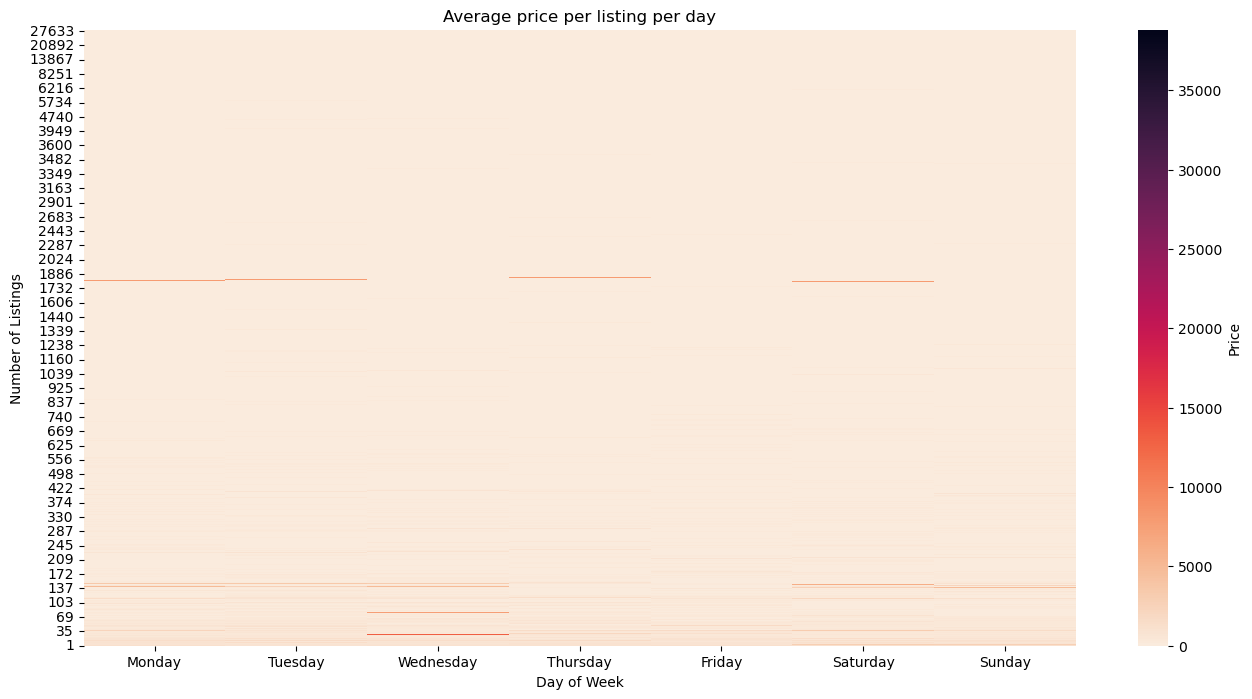

In [19]:
calendar = pd.read_csv('data/calendar.csv')
calendar = calendar[['listing_id', 'date', 'adjusted_price']] # Choose only necessary columns

calendar.rename(columns={'adjusted_price': 'price'}, inplace=True) # Fix column name
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float) # Clean price data
calendar['date'] = pd.to_datetime(calendar.date, format='%Y-%m-%d') # Fix date format

# Prepare aggregate data for heatmap
agg_data = calendar.groupby([calendar.date.dt.dayofweek, 'price'])['listing_id'].count().reset_index()
heatmap_data = agg_data.pivot_table(index='listing_id', columns='date', values='price', fill_value=0)

# Rename columns using the mapping
heatmap_data = heatmap_data.rename(columns=day_mapping)

# Create the heatmap
fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
sns.heatmap(data=heatmap_data,
            cmap='rocket_r',
            cbar=True,
            cbar_kws={'label': 'Price'},
            ax=ax)

# Set axis labels and plot title
plt.title('Average price per listing per day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Listings')
plt.gca().invert_yaxis()
plt.show()

Once more, `shorten the price range` to make the heatmap more visible.

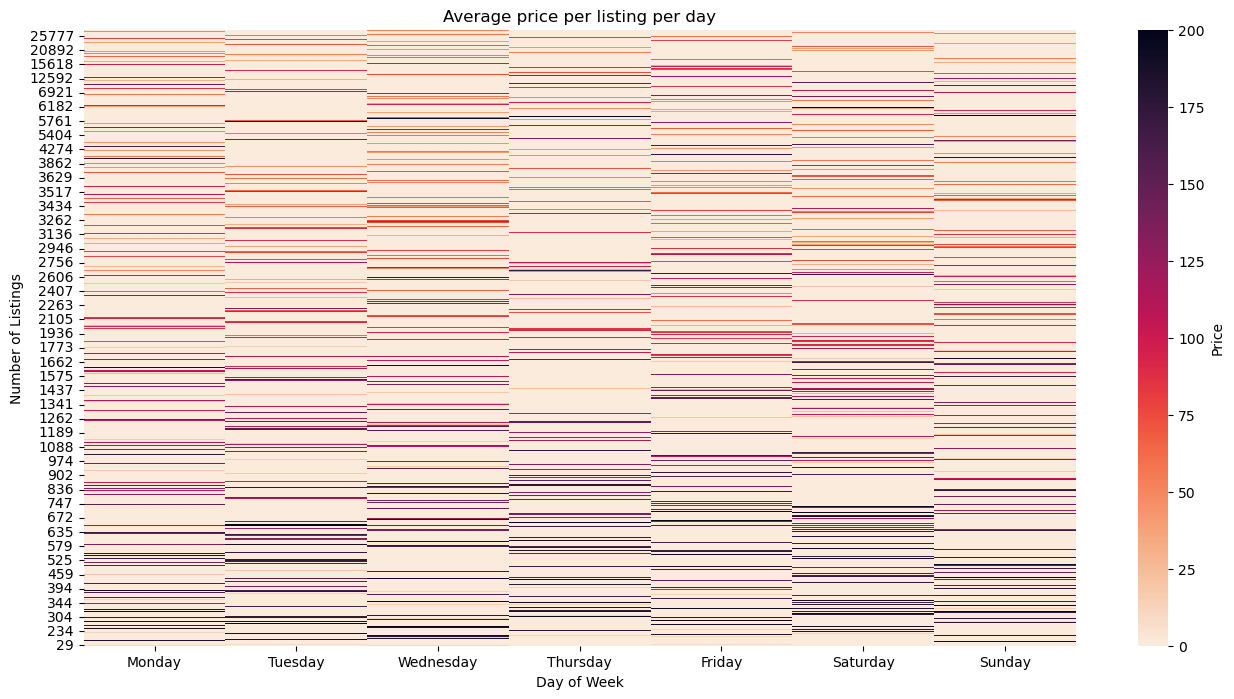

In [20]:
calendar = pd.read_csv('data/calendar.csv')
calendar = calendar[['listing_id', 'date', 'adjusted_price']] # Choose only necessary columns

calendar.rename(columns={'adjusted_price': 'price'}, inplace=True) # Fix column name
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float) # Clean price data
calendar['date'] = pd.to_datetime(calendar.date, format='%Y-%m-%d') # Fix date format

calendar = calendar[calendar['price'] <= 200] # For visualization purposes

# Prepare aggregate data for heatmap
agg_data = calendar.groupby([calendar.date.dt.dayofweek, 'price'])['listing_id'].count().reset_index()
heatmap_data = agg_data.pivot_table(index='listing_id', columns='date', values='price', fill_value=0)

# Rename columns using the mapping
heatmap_data = heatmap_data.rename(columns=day_mapping)

# Create the heatmap
fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
sns.heatmap(data=heatmap_data,
            cmap='rocket_r',
            cbar=True,
            cbar_kws={'label': 'Price'},
            ax=ax)

# Set axis labels and plot title
plt.title('Average price per listing per day')
plt.xlabel('Day of Week')
plt.ylabel('Number of Listings')
plt.gca().invert_yaxis()
plt.show()

Now, it is clear how many listings have the highest prices each day of the week.

## Listings per Host

Keep only the necessary columns from listings.csv 
- Group by `host_id` and count the occurences.

In [21]:
listings = pd.read_csv('data/listings.csv')
hosts = listings[['host_id', 'host_name', 'id']].groupby(['host_id', 'host_name']).count().sort_values(['id'], ascending=False)
hosts.rename(columns={'id': 'number of listings'}, inplace=True) # Fix column name

hosts

,,number of listings
host_id,host_name,
20104194,Upstreet,114
113548208,Mgv,88
90390850,Evan&Anetta,78
748818,George,74
47267002,Tèo,61
...,...,...
130728079,Iro And Manos,1
130646248,Fouad,1
130612477,Δήμητρα,1


Hosts are already ranked by index, if we add 1 (as index starts from 0).  
Of all the ranking, we will `choose 10 values to display` on x-axis.

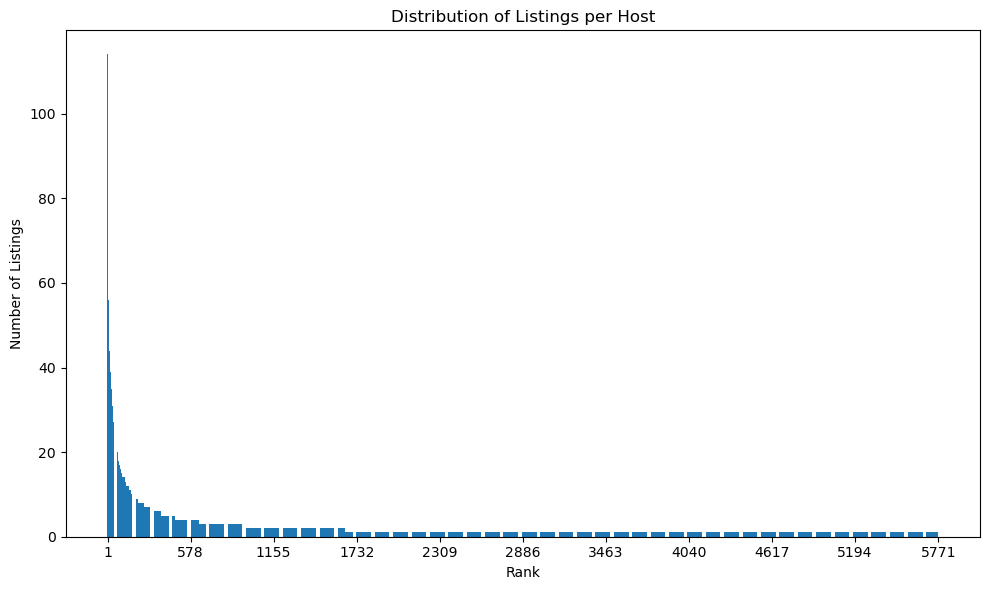

In [22]:
# Turn index into rank
hosts = hosts.reset_index(drop=True)
hosts.index += 1

num_hosts_to_display = 10

# Create a graph for all hosts but show only a subset on the x-axis
plt.figure(figsize=(10, 6))
plt.bar(hosts.index, hosts['number of listings'])
plt.xlabel("Rank")
plt.ylabel("Number of Listings")
plt.title("Distribution of Listings per Host")
plt.xticks(hosts.index[::len(hosts) // num_hosts_to_display])
plt.tight_layout()

# Show the graph
plt.show()

- For better visualization, we can narrow the ranking `down to the first 50 hosts`.

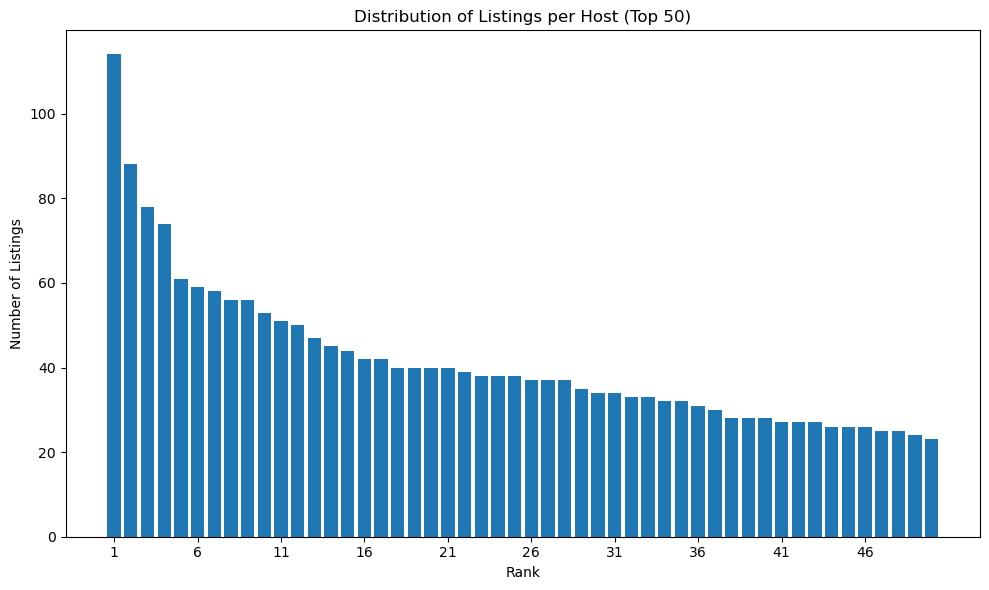

In [23]:
hosts = hosts.reset_index(drop=True)
hosts.index += 1

# Select a subset of the top 50 hosts
top_50_hosts = hosts.iloc[:50, :]

num_hosts_to_display = 10

# Create the graph
plt.figure(figsize=(10, 6))
plt.bar(top_50_hosts.index, top_50_hosts['number of listings'])
plt.xlabel("Rank")
plt.ylabel("Number of Listings")
plt.title("Distribution of Listings per Host (Top 50)")
plt.xticks(top_50_hosts.index[::len(top_50_hosts) // num_hosts_to_display], top_50_hosts.index[::len(top_50_hosts) // num_hosts_to_display])
plt.tight_layout()

# Show the graph
plt.show()

- Then apply the np.log() function on x-axis for `logarithmic scale`.

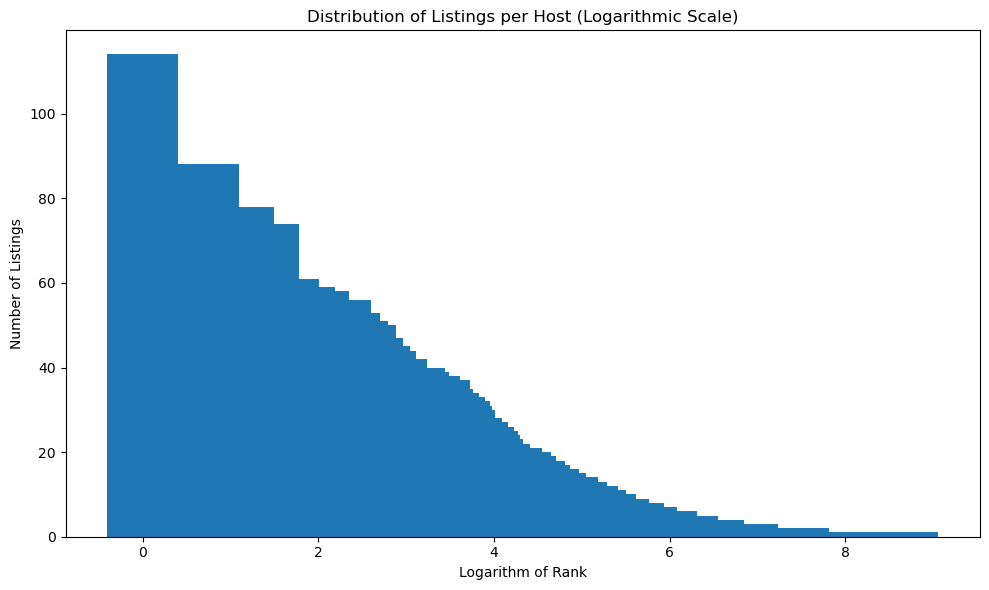

In [24]:
# Create a graph with the x-axis in logarithmic scale
plt.figure(figsize=(10, 6))
plt.bar(np.log(hosts.index), hosts['number of listings'])
plt.xlabel("Logarithm of Rank")
plt.ylabel("Number of Listings")
plt.title("Distribution of Listings per Host (Logarithmic Scale)")
plt.tight_layout()

# Show the graph
plt.show()

## Visualize Listings

Using the folium library, create a map of Athens (max zoom at 15).  
- Load the geojson file into the map to mark the range of the area ***(blue area)*** we are interested in. All listings should be within this marked area.    

- For performance purposes, the listings are ***clustered*** by their geographical distance.  
- Upon zooming in or clicking on a cluster, the listings (or more clusters inside) will appear.  
- The ***number*** on a cluster counts all the listings within, and the colour indicates how dense is this cluster   
regarding the number of listings (***orange*** = a great number, ***green*** = only a few).

- Finally, clicking a mark will trigger a ***pop-up*** showing the neighboorhood, price and host for the exact listing.

In [25]:
import folium
from folium.plugins import MarkerCluster

# Create a map centered on Athens, Greece with a maximum zoom level of 15
m = folium.Map(location=[37.9838, 23.7275], max_zoom=15)

# Load the GeoJSON file with UTF-8 encoding
geojson_file = 'Data/neighbourhoods.geojson'

# Read the GeoJSON file with UTF-8 encoding
with open(geojson_file, 'r', encoding='utf-8') as f:
    geojson_data = f.read()

# Add the GeoJSON data to the map
folium.GeoJson(geojson_data).add_to(m)

listings = pd.read_csv('data/listings.csv')
coordinates = listings[['latitude', 'longitude', 'neighbourhood_cleansed', 'price', 'host_name']]

marker_cluster = MarkerCluster().add_to(m)

for index, row in coordinates.iterrows():
    price = str(row['price'])  # Convert the 'price' to a string
    popup_text = f"""
    <div style="width: 200px;">
        <div style="font-size: 14px; font-weight: bold;">Neighbourhood:</div> {row['neighbourhood_cleansed']}<br>
        <div style="font-size: 14px; font-weight: bold;">Price:</div> {price}<br>
        <div style="font-size: 14px; font-weight: bold;">Host:</div> {row['host_name']}
    </div>
    """
    folium.Marker([row['latitude'], row['longitude']], popup=popup_text, 
                  icon=folium.Icon(color='blue', icon='home')).add_to(marker_cluster)

# Display the map
m.save('Athens.html')

The generated html file should be in the same folder as this notebook.